## **Digital Image Processing Lab Task: 09**
## **2023-SE-21**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(209.5), np.float64(239.5), np.float64(-0.5))

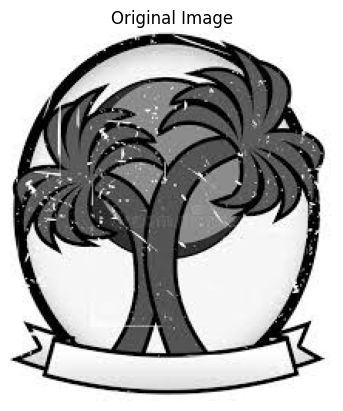

In [11]:
# Load image (BGR format)
img = cv2.imread('7.jfif')

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')


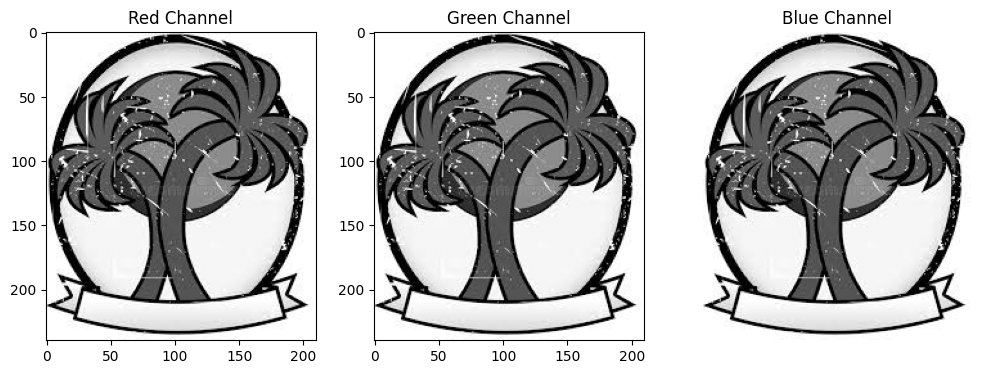

In [12]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')
plt.show()


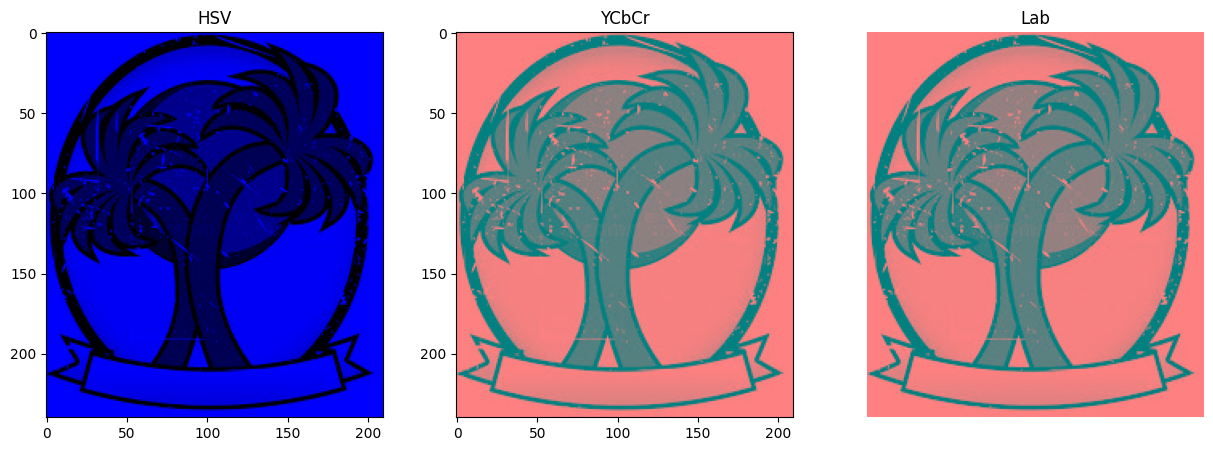

In [13]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(hsv)
plt.title("HSV")

plt.subplot(1,3,2)
plt.imshow(ycbcr)
plt.title("YCbCr")

plt.subplot(1,3,3)
plt.imshow(lab)
plt.title("Lab")
plt.axis('off')
plt.show()


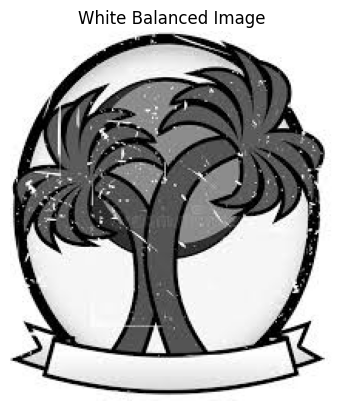

In [14]:
def white_balance(img):
    result = img.copy().astype(np.float32)
    avgB, avgG, avgR = np.mean(result[:,:,0]), np.mean(result[:,:,1]), np.mean(result[:,:,2])
    avgGray = (avgB + avgG + avgR) / 3

    result[:,:,0] *= avgGray / avgB
    result[:,:,1] *= avgGray / avgG
    result[:,:,2] *= avgGray / avgR

    return np.clip(result, 0, 255).astype(np.uint8)

wb_img = white_balance(img_rgb)

plt.imshow(wb_img)
plt.title("White Balanced Image")
plt.axis('off')
plt.show()


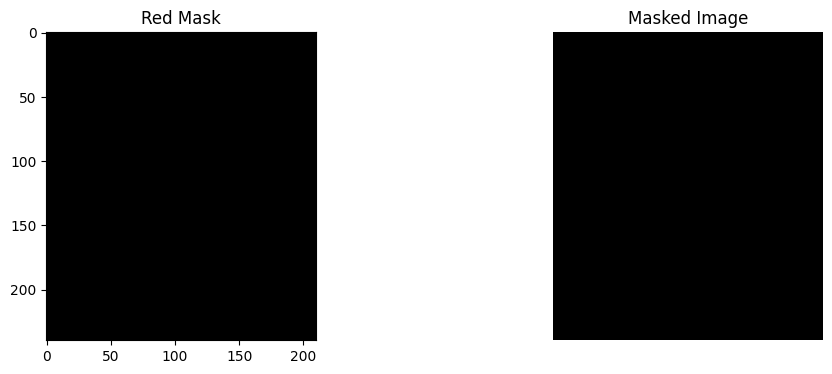

In [15]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

mask = cv2.inRange(hsv_img, lower_red, upper_red)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Red Mask")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Masked Image")
plt.axis('off')
plt.show()


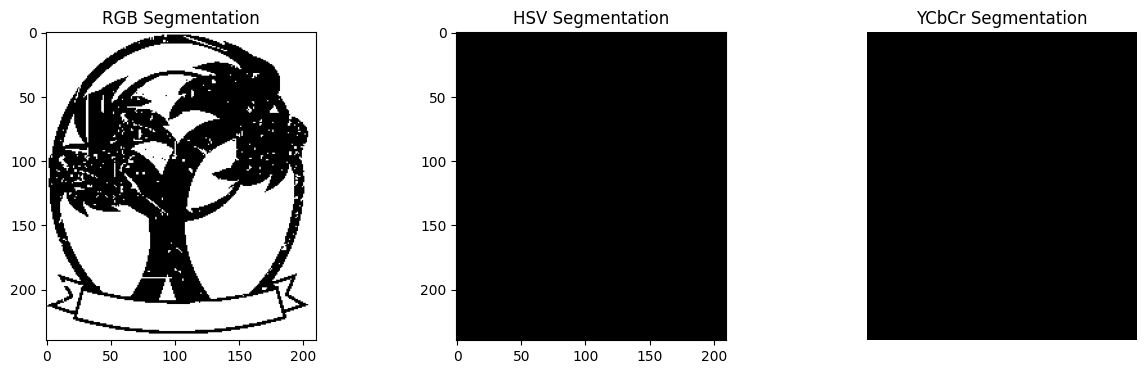

In [16]:
# Thresholding in different color spaces

# RGB
_, rgb_seg = cv2.threshold(R, 120, 255, cv2.THRESH_BINARY)

# HSV (Hue channel)
_, hsv_seg = cv2.threshold(hsv[:,:,0], 50, 255, cv2.THRESH_BINARY)

# YCbCr (Cb channel)
_, ycbcr_seg = cv2.threshold(ycbcr[:,:,2], 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(rgb_seg, cmap='gray')
plt.title("RGB Segmentation")

plt.subplot(1,3,2)
plt.imshow(hsv_seg, cmap='gray')
plt.title("HSV Segmentation")

plt.subplot(1,3,3)
plt.imshow(ycbcr_seg, cmap='gray')
plt.title("YCbCr Segmentation")
plt.axis('off')
plt.show()


# Task 7: Color Space Conversion, White Balancing, and Color-Based Segmentation

**Objective:** Perform color space analysis, white balance correction, and color-based segmentation on an image to enhance quality and extract specific color regions.

---

### Step 1: Load Image and Display RGB Channels
- Split the image into Red, Green, and Blue channels to analyze individual color contributions.

### Step 2: Convert to Different Color Spaces
- Convert the image to **HSV**, **YCbCr**, and **Lab** color spaces for advanced processing.
- HSV separates hue and intensity, YCbCr separates luminance and chrominance, Lab separates lightness and color channels.

### Step 3: White Balance Correction
- Corrects color cast due to lighting.
- Ensures neutral colors appear neutral.

### Step 4: Red Color Detection Using HSV Mask
- Isolate red regions using a mask in HSV color space.
- Apply `bitwise_and` to highlight red areas on the original image.

### Step 5: Thresholding in Different Color Spaces
- **RGB** segmentation using the Red channel.
- **HSV** segmentation using the Hue channel.
- **YCbCr** segmentation using the Cb channel.
- Separates foreground and background in different color channels.

---

**Summary Table:**

| Step | Purpose |
|------|---------|
| RGB Channels | Analyze contributions of Red, Green, Blue. |
| Color Spaces | Convert to HSV, YCbCr, Lab for segmentation and enhancement. |
| White Balance | Correct color cast and improve visual appearance. |
| HSV Masking | Detect specific color (red) regions. |
| Thresholding | Segment image using different color channels. |

**Outcome:**  
- Image enhanced with white balance correction.  
- Red color regions isolated.  
- Segmentation achieved in multiple color spaces for flexibility.
